In [74]:



from collections import defaultdict
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from collections import Counter

import pickle

LABOUR_HASHTAG = '#Labour'
TORY_HASHTAG = '#Tories'

In [ ]:
with open('hashtag_tweets', 'rb') as f:
    hashtag_tweets = pickle.load(f)

In [13]:
len(hashtag_tweets[TORY_HASHTAG])



2000

In [15]:
hashtag_tweets.keys()

dict_keys(['#Labour', '#Tories'])

In [16]:
hashtag_tweets[LABOUR_HASHTAG][1]

Status(_api=<tweepy.api.API object at 0x11797ecf8>, _json={'created_at': 'Mon Jul 10 10:34:48 +0000 2017', 'id': 884360248655589377, 'id_str': '884360248655589377', 'text': "One woman's terrorist sympathiser is now the same woman's policy maker.\n\n#TheresaMay #Tories #Corbyn #Labour", 'truncated': False, 'entities': {'hashtags': [{'text': 'TheresaMay', 'indices': [73, 84]}, {'text': 'Tories', 'indices': [85, 92]}, {'text': 'Corbyn', 'indices': [93, 100]}, {'text': 'Labour', 'indices': [101, 108]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 479457690, 'id_str': '479457690', 'name': '(((Alan Shore)))', 'screen_name': 'FlamingoAlan', 'location': '

In [ ]:
#result = hashtag_tweets['#Corbyn'][0]
#result._json

In [ ]:
#result = hashtag_tweets['#May'][1]
#result._json.keys()

In [ ]:
#result = hashtag_tweets['#May'][4]
#result._json['user']


In [17]:
raw_data_L = {'text': [], 'user': [], 'followers_count': [], 'friends_count': [], 'retweet_count': [], 'favorite_count':[]}

for tweet in hashtag_tweets[LABOUR_HASHTAG]:
    raw_data_L['retweet_count'].append(tweet._json['retweet_count'])
    raw_data_L['favorite_count'].append(tweet._json['favorite_count'])
    raw_data_L['user'].append(tweet._json['user']['name'])
    raw_data_L['followers_count'].append(tweet._json['user']['followers_count'])
    raw_data_L['friends_count'].append(tweet._json['user']['friends_count'])
    raw_data_L['text'].append(tweet._json['text'])
    


# index=['User {0}'.format(i) for i in range(1000)])

In [18]:
raw_data_T = {'text': [], 'user': [], 'followers_count': [], 'friends_count': [], 'retweet_count': [], 'favorite_count':[]}

for tweet in hashtag_tweets[TORY_HASHTAG]:
    raw_data_T['retweet_count'].append(tweet._json['retweet_count'])
    raw_data_T['favorite_count'].append(tweet._json['favorite_count'])
    raw_data_T['user'].append(tweet._json['user']['name'])
    raw_data_T['followers_count'].append(tweet._json['user']['followers_count'])
    raw_data_T['friends_count'].append(tweet._json['user']['friends_count'])
    raw_data_T['text'].append(tweet._json['text'])

In [19]:
labour_df = pd.DataFrame(raw_data_L, columns=['user', 'followers_count', 'friends_count', 'text', 'favorite_count', 'retweet_count']) 

In [20]:
tories_df = pd.DataFrame(raw_data_T, columns=['user', 'followers_count', 'friends_count', 'text', 'favorite_count', 'retweet_count']) 


In [21]:
tories_df.head()

,user,followers_count,friends_count,text,favorite_count,retweet_count
0,upNORTHandGRIM,4215,4822,Get rid of her. Get a #Leave Jacob Rees Mogg a...,0,0
1,(((Alan Shore))),1108,633,One woman's terrorist sympathiser is now the s...,0,0
2,(((AJ)))❄️🇪🇺🌹,4453,4987,@jeremycorbyn #Labour owe the #Tories nothing ...,0,0
3,Nick B,527,856,RT @DavidAsh_Author: Why should #Corbyn forgiv...,0,5
4,Blue Blood,109,505,If the #Tories staffed the #Prisons properly i...,0,0


In [22]:
labour_df.head() 

,user,followers_count,friends_count,text,favorite_count,retweet_count
0,Moya Jackson,347,557,RT @KellyMarieLD: The irony in Theresa May's c...,0,6
1,(((Alan Shore))),1108,633,One woman's terrorist sympathiser is now the s...,0,0
2,rodney stewart adams,7304,6450,STICK TO THE POST-ELECTION PLAN #OhJeremyCorby...,0,0
3,Robbo7,2899,4946,RT @MomentumCV: After Years of Snarky Sniping ...,0,4
4,Lana Davituliani,436,914,In defence of #Labour's free tuition fee polic...,0,0


In [23]:
tories_df.sort_values('retweet_count', ascending=False)

,user,followers_count,friends_count,text,favorite_count,retweet_count
1065,Nora Okuogume,513,1177,RT @Leigh_Pickett: The #Tories &amp; #DUP answ...,0,4013
431,Liam,52,185,RT @Harryslaststand: Nothing quite says entitl...,0,942
1321,Anne Griffin,381,268,RT @Harryslaststand: Nothing quite says entitl...,0,942
1754,John Parkin,738,993,RT @Harryslaststand: Nothing quite says entitl...,0,942
1753,Tristram Wyatt,1525,1405,RT @Harryslaststand: Nothing quite says entitl...,0,942
427,Ged Grebby,1568,3442,RT @Harryslaststand: Nothing quite says entitl...,0,942
421,Michael,71,529,RT @Harryslaststand: Nothing quite says entitl...,0,942
1739,Gillian Nielsen,1554,2196,RT @Harryslaststand: Nothing quite says entitl...,0,942
1736,Oliver Mason 🇪🇺,907,266,RT @Harryslaststand: Nothing quite says entitl...,0,942
1327,nicola aldous,29,145,RT @Harryslaststand: Nothing quite says entitl...,0,942


In [24]:
print ('More retweet Of Tories ++ ' + tories_df['text'][1055])

More retweet Of Tories ++ RT @Far_Right_Watch: #Tories Britain, 2017, right here. https://t.co/wBaNrHMLZs


In [25]:
labour_df.sort_values('retweet_count', ascending=False)

,user,followers_count,friends_count,text,favorite_count,retweet_count
1782,Nancy Young,3,22,"RT @Snowden: However #GE2017 ends, one must as...",0,10898
590,Tyron Tachi,1203,3406,RT @robabdul: #SaveOurNHS Theresa May is selli...,0,497
595,Rob Abdul,47265,25086,RT @robabdul: #SaveOurNHS Theresa May is selli...,0,497
536,K. Rowling,41,91,RT @robabdul: #SaveOurNHS Theresa May is selli...,0,497
592,Geoff Roughton,146,268,RT @robabdul: #SaveOurNHS Theresa May is selli...,0,497
280,irenefurnivalnoslave,173,88,RT @robabdul: #SaveOurNHS Theresa May is selli...,0,497
1540,John s,1591,4782,RT @logansteven: #keepcorbyn #shankly was my k...,0,372
1533,Ruth Rosenau,3114,2881,RT @logansteven: #keepcorbyn #shankly was my k...,0,372
740,Martin the Cabbie,5010,3882,RT @EUVoteLeave23rd: #EmmaDentCoad #Labour's n...,0,303
739,Alan Winton,1466,1466,RT @EUVoteLeave23rd: #EmmaDentCoad #Labour's n...,0,303


In [26]:
print ('More retweet Of Labour ++ ' + labour_df['text'][230])

More retweet Of Labour ++ Nailed it! #Brexit biggest unforced error in British history. Makes #Suez look like a typo. And #Labour Brexit no d… https://t.co/I2WFPXRJLw


In [27]:
labour_df.sort_values('favorite_count', ascending=False)



,user,followers_count,friends_count,text,favorite_count,retweet_count
1868,Michael Fabricant,25449,1028,#Labour admit they got their election sums wro...,152,132
1767,Richard Corbett,31893,7805,"Sad news for #Labour, but a well-deserved reti...",48,29
1851,Michael Fabricant,25449,1028,I do.\nThe #Conservative campaign just took #L...,39,16
1723,Harry Leslie Smith,98584,8131,#labour‘Harry's Last Stand Episode 7 Austerity...,31,22
1163,Stephen Canning,7915,5090,"#Labour tried to #UnseatIDS today, outnumbered...",23,10
1890,Lynn Kelly,2399,3872,An alternative #Labour vision? Now? I don't th...,21,15
1541,Trevor Stables,8352,9175,Excellent piece in The Guardian. Wake up!! #La...,18,24
1645,Ben Walker,6329,3851,So £100Bn to abolish student debt &amp; now #L...,18,18
1653,Son of Robespierre,8818,8369,#Corbyn is going to have to have a Damascene c...,17,7
774,Ann,10561,8741,Theresa May asking us to help her when she cal...,15,10


In [28]:
print ('More favorite tweet Of Labour ++ ' + labour_df['text'][1192])



More favorite tweet Of Labour ++ #Labour "will not commit to wiping student debt unless they can afford to". Well the good news is they can't, so that's that 😂 @angelarayner


In [29]:
tories_df.sort_values('favorite_count', ascending=False)




,user,followers_count,friends_count,text,favorite_count,retweet_count
1205,Nick,20299,21840,Sick of hearing from posh #Tories telling us w...,199,125
1745,(((AJ)))❄️🇪🇺🌹,4453,4987,The fact #Tories are more outraged about being...,34,13
858,andrew anniwell,4013,3991,12 months ago we voted out the EU\nA month ago...,31,16
1120,Far Right Watch,16624,598,"#Tories Britain, 2017, right here. https://t.c...",23,49
133,Far Right Watch,16623,598,Theresa May to 'relaunch' her #Tories Policies...,22,15
1712,Far Right Watch,16624,598,"""Police cuts ‘jeopardising hunt for potential ...",21,21
1092,Far Right Watch,16624,598,"#Tories Theresa May ""Strong and Stable"" ...\n\...",20,9
363,Mummy Emerita,176,487,Pensions minister admits no letters were sent ...,19,20
1861,David Thomas,973,666,@nlc_snp All those who voted for the candidate...,18,9
169,ANIMAL ADVOCATE Ⓥ,57483,4963,"It's OK #Tories, you can keep on bribing the m...",18,7


In [30]:
print ('More favorite tweet Of Tories ++ ' + tories_df['text'][462])

More favorite tweet Of Tories ++ RT @Harryslaststand: Nothing quite says entitlement so well in a time of austerity as a gilded statue of Thatcher. #Tories https://t.co/Wqw…


In [31]:
print (tories_df['followers_count'].mean())
print (tories_df['friends_count'].mean())
print (tories_df['favorite_count'].mean())
print (tories_df['retweet_count'].mean())


2037.7005
1746.138
0.572
141.0445


In [32]:
print (labour_df['followers_count'].mean())
print (labour_df['friends_count'].mean())
print (labour_df['favorite_count'].mean())
print (labour_df['retweet_count'].mean())



1978.019
1727.234
0.575
28.909


In [ ]:
#may_df['followers_count'].mean() - Cor_df['followers_count'].mean()

In [ ]:
#may_df['favorite_count'].mean() - Cor_df['favorite_count'].mean()

In [ ]:
#Cor_df['retweet_count'].quantile([.25, .5, .75])

In [ ]:
#may_df['retweet_count'].quantile([.25, .5, .75])

In [ ]:
#surveys_by_sex_df = surveys_df.groupby('sex')
#surveys_by_sex_df

In [ ]:
#surveys_by_sex_df['hindfoot_length'].describe()

In [33]:
text_tories = ""
for text in tories_df['text']:
    text_tories += " " + text

text_tories = text_tories.lower()

In [34]:
text_labour = ""
for text in labour_df['text']:
    text_labour += " " + text

text_labour = text_labour.lower()

In [ ]:
#wordcloud = WordCloud().generate(text_con)

In [ ]:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')

In [ ]:
#plt.show()

In [35]:
my_list_labour = text_labour.split()


counter = Counter(my_list_labour)
print(counter)


Counter({'#labour': 1687, 'the': 1050, 'rt': 1048, 'to': 818, 'a': 585, 'of': 476, 'is': 370, 'on': 339, 'for': 326, 'in': 313, 'and': 300, '#corbyn': 256, 'they': 230, 'an': 197, '-': 182, '&amp;': 166, 'their': 165, 'you': 163, 'this': 162, 'election': 162, 'are': 161, 'with': 154, 'i': 151, 'be': 146, 'it': 139, '#jc4pm': 139, 'got': 138, '@mike_fabricant:': 137, 'https…': 135, 'not': 134, 'wrong': 129, '#tories': 128, 'tuition': 128, 'fees.': 125, 'sums': 124, 'impossible': 121, 'as': 119, '£100bn.': 119, 'surprise.': 119, 'admit': 118, 'refund': 118, 'wot': 118, 'that': 117, 'party': 117, '#forthemany': 111, 'from': 108, 'if': 99, '#tory': 99, 'may': 98, '#brexit': 98, '#justiceforgrenfell': 98, '#grenfell': 97, 'have': 94, 'has': 94, 'leader': 94, 'brexit': 94, 'by': 93, 'all': 90, 'at': 90, 'will': 90, 'now': 89, 'but': 88, "#labour's": 86, 'labour': 84, '@jeremycorbyn': 81, 'her': 79, 'was': 78, 'so': 77, 'we': 77, '#theresamay': 72, 'help': 69, 'just': 69, '#forthemanynotthefe

In [36]:
my_list_tories = text_tories.split()


counter = Counter(my_list_tories)
print(counter)

Counter({'#tories': 1840, 'the': 1334, 'rt': 1314, 'a': 934, 'of': 919, 'to': 747, 'for': 510, 'is': 451, 'are': 433, 'in': 407, '#labour': 355, '-': 335, 'as': 319, 'us': 281, 'best': 258, "what's": 255, 'so': 248, 'well': 229, 'time': 224, 'says': 221, 'brexit': 220, 'leader': 219, 'political': 219, 'and': 218, '#brexit': 217, 'nothing': 214, 'quite': 211, 'austerity': 211, '+': 211, 'economic': 209, 'less': 209, 'statue': 208, 'suicide': 208, '@city_livery_sm:': 207, 'beginning': 207, 'realize': 207, 'so.': 207, 'whoever': 207, 'sacks': 207, '+…': 207, '@harryslaststand:': 206, 'entitlement': 206, 'gilded': 206, 'thatcher.': 206, 'https://t.co/wqw…': 206, '&amp;': 197, "it's": 180, 'about': 179, 'only': 164, 'from': 162, 'with': 158, 'on': 154, 'ever': 152, 'when': 151, 'will': 145, 'it': 144, 'always': 137, 'they': 133, '@mylegalforum:': 133, 'have': 131, 'sick': 128, '@far_right_watch:': 128, 'posh': 127, 'telling': 126, 'them!': 125, '#…': 125, 'hearing': 124, '#theresamay': 122,

In [37]:
with open('stopwords.txt') as f:
    stop_words = []
    for line in f:
        stop_words.append(line.rstrip())

In [98]:
filter_words = {'labour','Labour', 'Tories','tories','https://t.co/xOSOYNwTw4', 'https','rt', 'are', 'on', 'by', 'The', 'if', '&amp;', 'i', 'at', 'has', 'will','your', 'it', 'that', 'not', 'just', 'https:/…', 'achieved', 'one', 'as', "it's", 'do', 'Enough', 'what', ':https://t…', 'message', 'https://t.co/ZDgQnY8lOP'} 

filter_words = filter_words | set(stop_words)
filter_words

{'&amp;',
 ':https://t…',
 'Enough',
 'Labour',
 'The',
 'Tories',
 'a',
 'about',
 'above',
 'achieved',
 'across',
 'after',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'among',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyone',
 'anything',
 'anywhere',
 'are',
 'area',
 'areas',
 'around',
 'as',
 'ask',
 'asked',
 'asking',
 'asks',
 'at',
 'away',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'began',
 'behind',
 'being',
 'beings',
 'best',
 'better',
 'between',
 'big',
 'both',
 'but',
 'by',
 'c',
 'came',
 'can',
 'cannot',
 'case',
 'cases',
 'certain',
 'certainly',
 'clear',
 'clearly',
 'come',
 'could',
 'd',
 'did',
 'differ',
 'different',
 'differently',
 'do',
 'does',
 'done',
 'down',
 'downed',
 'downing',
 'downs',
 'during',
 'e',
 'each',
 'early',
 'either',
 'end',
 'ended',
 'ending',
 'ends',
 'enough',
 'even',


In [99]:
filtered_list_labour = []
for word in my_list_labour:
    if word not in filter_words and not word.startswith('https') and len(word) >= 2:
        filtered_list_labour.append(word)
        
print(filtered_list_labour)        


        

['@kellymarield:', 'irony', 'theresa', "may's", 'call', 'help', 'corbyn', '#labour', 'supported', '#conservatives', 'hard…', "woman's", 'terrorist', 'sympathiser', "woman's", 'policy', 'maker.', '#theresamay', '#tories', '#corbyn', '#labour', 'stick', 'post-election', 'plan', '#ohjeremycorbyn', 'relentless', 'hardball', 'opposition', 'bring', 'illegitimate', 'government', '#labour', '@stwuk', '@momentumcv:', 'snarky', 'sniping', '#labour', 'offers', 'serious', 'opposition,', 'together?', 'jog', 'las…', 'defence', "#labour's", 'free', 'tuition', 'fee', 'policy', 'via', '@prospect_uk', '@jeremycorbyn', '#labour', 'owe', '#tories', 'esp', 'conduct', 'election😒', '#corbyn', 'helps…', '@originalpealand:', '@sunnyboyblack', '@demindblower', '#dupdeal', '#theresamay', 'win', '#labour', 'support', "it'd", 'eas…', '#tories', '#toriesout', '#votelabour', '#labour', '#elite', '#elitemafia', '#politicians', 'on,', 'dare', 'fake', 'suprise!', '@momentumcv:', 'snarky', 'sniping', '#labour', 'offers'

In [100]:
filtered_list_tories = []
for word in my_list_tories:
    if word not in filter_words and not word.startswith('https') and len(word) >= 2:
        filtered_list_tories.append(word)
        
print(filtered_list_tories)        


        

['rid', 'her.', '#leave', 'jacob', 'rees', 'mogg', 'leader.', 'call', 'election.', "he'll", 'deliver', 'landslide', 'the…', "woman's", 'terrorist', 'sympathiser', "woman's", 'policy', 'maker.', '#theresamay', '#tories', '#corbyn', '#labour', '@jeremycorbyn', '#labour', 'owe', '#tories', 'esp', 'conduct', 'election😒', '#corbyn', 'helps…', '@davidash_author:', '#corbyn', 'forgive', '@theresa_may', '#tories', 'abuse', 'hurled', 'him.', '#wrightstuff', '#tories', 'staffed', '#prisons', 'properly', 'issue!…', '@jeannebartram', 'simply', "don't", 'trade', 'deal.', 'hard', 'fellow', '#tories?', '#tories', '#toriesout', '#votelabour', '#labour', '#elite', '#elitemafia', '#politicians', 'on,', 'dare', 'fake', 'suprise!', '@pjames1105', "what's", '#tuitionfees', 'overdraft?', 'makes', 'sense.', 'honestly', 'believe', '#tories', "don'…", '#tories', '#cryingwolf', '#dogsoftwitter', '#crisisinpolicing', '@cartoonralph:', '#publicsectorpay', '#publicsectorpaycap', '#tories', '#labour', '@tas_pats_lv

In [101]:
from collections import Counter
counter_labour = Counter(filtered_list_labour)

print(counter_labour)



Counter({'#labour': 1687, '#corbyn': 256, 'election': 162, '#jc4pm': 139, '@mike_fabricant:': 137, 'wrong': 129, '#tories': 128, 'tuition': 128, 'fees.': 125, 'sums': 124, 'impossible': 121, '£100bn.': 119, 'surprise.': 119, 'admit': 118, 'refund': 118, 'wot': 118, 'party': 117, '#forthemany': 111, '#tory': 99, '#brexit': 98, '#justiceforgrenfell': 98, '#grenfell': 97, 'leader': 94, 'brexit': 94, "#labour's": 86, '@jeremycorbyn': 81, '#theresamay': 72, 'help': 69, '#forthemanynotthefew': 69, '#ge2017': 68, 'mps': 67, 'political': 67, 'student': 66, 'theresa': 65, 'economic': 62, '#r4today': 61, 'so.': 60, 'beginning': 59, 'whoever': 58, '@showeda:': 58, 'debt': 57, '@city_livery_sm:': 57, 'realize': 57, 'suicide': 57, 'sacks': 57, '+…': 57, '#conservatives': 56, '#corbyneffect': 56, '#jeremycorbyn': 55, 'corbyn': 52, '#snp': 49, '£100bn': 49, '#toriesout': 47, 'people': 46, "don't": 44, 'mp': 44, '#libdems': 43, 'country': 43, 'jeremy': 41, '#labour,': 41, 'tory': 39, 'vote': 39, 'camp

In [102]:
from collections import Counter
counter_tory = Counter(filtered_list_tories)

print(counter_tory)




Counter({'#tories': 1840, '#labour': 355, "what's": 255, 'time': 224, 'brexit': 220, 'leader': 219, 'political': 219, '#brexit': 217, 'austerity': 211, 'economic': 209, 'statue': 208, 'suicide': 208, '@city_livery_sm:': 207, 'beginning': 207, 'realize': 207, 'so.': 207, 'whoever': 207, 'sacks': 207, '+…': 207, '@harryslaststand:': 206, 'entitlement': 206, 'gilded': 206, 'thatcher.': 206, '@mylegalforum:': 133, 'sick': 128, '@far_right_watch:': 128, 'posh': 127, 'telling': 126, 'them!': 125, '#…': 125, 'hearing': 124, '#theresamay': 122, '...': 71, '#dup': 69, '#nhs': 65, '#marr': 60, "don't": 58, 'voted': 55, 'jacob': 52, 'britain,': 50, 'potential': 49, 'here.': 46, '#jacobreesmogg': 45, '2017,': 45, '#bbcsp': 44, 'fight': 43, 'theresa': 42, 'public': 42, '#ukip': 42, '#toriesout': 41, '#corbyn': 40, 'people': 38, '#tories.': 37, 'ago': 37, 'pro': 36, 'deal': 35, '#remain': 35, 'rees-mogg': 34, '@snowflakeaj_87:': 33, 'poll': 33, 'eu': 33, 'denies': 33, 'conflict': 33, 'uk': 32, '#jer

In [103]:
import numpy as np

from sklearn.svm import LinearSVC

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix

In [104]:
tory_texts = list(tories_df['text'])

In [105]:
tory_texts[3]

'RT @DavidAsh_Author: Why should #Corbyn forgive @theresa_may &amp; the #Tories for all the abuse they hurled at him. #wrightstuff https://t.co/…'

In [106]:
labour_texts = list(labour_df['text'])

In [107]:
labour_texts[1]

"One woman's terrorist sympathiser is now the same woman's policy maker.\n\n#TheresaMay #Tories #Corbyn #Labour"

In [108]:
tory_vocab = []
for word, count in counter_tory.most_common(100):
    tory_vocab.append(word)

labour_vocab = []
for word, count in counter_labour.most_common(100):
    labour_vocab.append(word)
    
vocab = tory_vocab + labour_vocab

vocab = list(set(vocab))
    
count_vectorizer = CountVectorizer(vocabulary=vocab)

In [109]:
td_matrix = count_vectorizer.fit_transform(labour_texts + tory_texts)
y = [LABOUR_HASHTAG] * len(labour_texts) + [TORY_HASHTAG] * len(tory_texts)


In [110]:
count_vectorizer.vocabulary

['gone',
 'piece',
 'potential',
 '#remain',
 'prospect',
 'help',
 'thanks',
 '#peston',
 '#bbcsp',
 '#theresamay',
 "#labour's",
 'tuition',
 'deal',
 '#nhs..share',
 'gilded',
 'mps',
 '#waspi',
 'admit',
 'wake',
 'sake',
 'whoever',
 'pro',
 'fund',
 '@smethwickmon:',
 'hunt',
 'them!',
 '@trevdick:',
 "i'm",
 "that's",
 'austerity',
 'tory',
 'impossible',
 'fight',
 'sacks',
 'ago',
 '@snowflakeaj_87:',
 '@far_right_watch:',
 'links',
 'money',
 '#grenfelltower',
 'wot',
 '#tory',
 'party',
 'pay',
 '2017,',
 '#nhs',
 'campaign',
 '#corbyneffect',
 'retirement',
 '#jacobreesmogg',
 'land',
 'statue',
 'posh',
 'hospitals',
 '@eurolabour',
 '#snp',
 'news',
 'mp',
 '#libdems',
 '@angelarayner',
 'election',
 '#bbcnews',
 '@mylegalforum:',
 'beginning',
 'people',
 'it.',
 'corbyn',
 '#ukip',
 '(eplp).',
 "don't",
 'well-deserved',
 '@jeremycorbyn',
 'sums',
 'sad',
 '@harryslaststand:',
 'strip*',
 'hearing',
 'britain,',
 '@happybird_y:',
 'manifesto',
 'wrong',
 'cuts',
 '@rcor

In [51]:
svc = LinearSVC()

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
from sklearn.metrics import confusion_matrix, classification_report

In [113]:
X_train, X_test, y_train, y_test = train_test_split(td_matrix, y, test_size=0.5, random_state=0)

In [114]:
svc.fit_transform(X_train, y_train)

/Users/MacBook3/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


<2000x55 sparse matrix of type '<class 'numpy.int64'>'
	with 3195 stored elements in Compressed Sparse Column format>

In [115]:
y_pred = svc.predict(X_test)

In [116]:

print(confusion_matrix(y_test, y_pred))

[[565 464]
 [125 846]]


In [117]:
words_importances = list(zip(list(count_vectorizer.vocabulary), svc.coef_.tolist()[0]))

In [118]:
words_importances.sort(key=lambda x:x[1], reverse=True)

In [119]:
words_importances[:50]

[('12', 2.0931144486268343),
 ('suicide', 1.3266488923445932),
 ('admit', 1.2221000017716082),
 ('policies', 0.8552299277941899),
 ('sent', 0.8262539061848134),
 ('statue', 0.8140812431565432),
 ('sad', 0.6427959743548063),
 ('posh', 0.6302309471996285),
 ('fight', 0.5855969905658456),
 ('cuts', 0.4879425732817233),
 ('wot', 0.43982542775842703),
 ('excellent', 0.3765199310552106),
 ('eu', 0.3705938382641947),
 ('people', 0.3591449568112229),
 ('sick', 0.3540318360125836),
 ('sake', 0.3467983375811584),
 ('via', 0.30569732128342364),
 ('gilded', 0.2890195617357607),
 ('entitlement', 0.2890195617357607),
 ('brexit', 0.28561016851130394),
 ('voted', 0.2791942397925789),
 ('conflict', 0.2708598602563257),
 ('denies', 0.2708598602563257),
 ('minister', 0.2659572029766455),
 ('potential', 0.256476471298439),
 ('sacks', 0.2111909705450254),
 ('beginning', 0.2111909705450254),
 ('realize', 0.2111909705450254),
 ('hunt', 0.21036021810428737),
 ('uk', 0.1851940906405042),
 ('deal', 0.1790721353

In [120]:
from sklearn.linear_model import LogisticRegression


In [121]:
model = LogisticRegression() 
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(td_matrix, y, test_size=0.5, random_state=0)
y_actual = y_test

In [123]:
svc.fit_transform(X_train, y_train)

/Users/MacBook3/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


<2000x55 sparse matrix of type '<class 'numpy.int64'>'
	with 3195 stored elements in Compressed Sparse Column format>

In [124]:
y_pred = model.predict(X_test)
print (confusion_matrix(y_actual, y_pred))


[[570 459]
 [125 846]]


In [130]:
labour_string = " ".join(filtered_list_labour)
wordcloud = WordCloud().generate(labour_string)

In [131]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

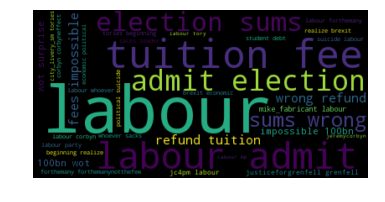

In [132]:
plt.show()
